>[Ряд Тейлора](#scrollTo=jlG03TFH0Pfl)

>[Ряд Фур'є з дійсними коефіцієнтами](#scrollTo=YVOeAr9X0nmc)

>[Комплексні числа](#scrollTo=eHuMPiQ14npi)

>[Комплексний ряд Фур'є](#scrollTo=LfegPJxY4_GL)

>[Дискретне перетворення Фур'є](#scrollTo=f-CfYRCP5OTy)

>[Швидке перетворення Фур'є](#scrollTo=kTFO9Gyx5gWN)

>[Використання в задачах обробки звуку](#scrollTo=Q9yCA-fF53P_)

>>[Спектрограма звукового сигналу](#scrollTo=g6spUQMf6Ldr)

>[Додаткові матеріали](#scrollTo=DO1PWogigUyq)



#Ряд Тейлора

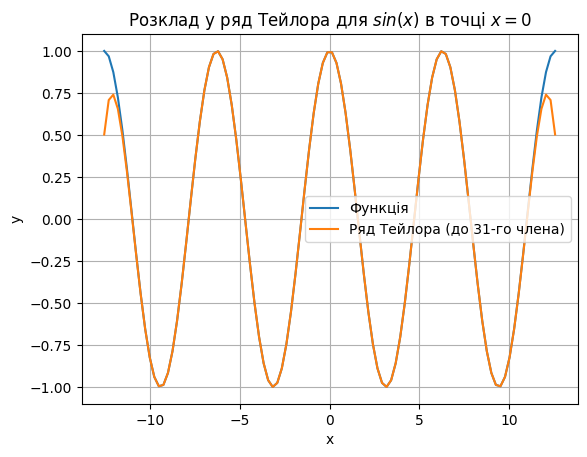

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def my_taylor_series(func, x0, n_terms):
    """
    Розклад у ряд Тейлора без використання вбудованих функцій.

    :param func: Функція, яку будемо розкладати.
    :param x0: Точка розкладання.
    :param n_terms: Кількість членів ряду Тейлора.
    :return: Ряд Тейлора
    """
    taylor_series = 0
    for n in range(n_terms):
        # Обчислення n-го члена ряду Тейлора
        term = func.diff(x, n).subs(x, x0) / sp.factorial(n) * (x - x0)**n
        taylor_series += term
    return taylor_series

# Визначення символьної змінної та функції
x = sp.symbols('x')
# func = sp.sin(x) + 6*sp.cos(x)- x**2
func = sp.cos(x)

# Точка розкладання та кількість членів ряду Тейлора
x0 = 0
n_terms = 31

# Розклад у ряд Тейлора
taylor_series = my_taylor_series(func, x0, n_terms)

# Компіляція функцій для NumPy
func_np = sp.lambdify(x, func, 'numpy')
taylor_np = sp.lambdify(x, taylor_series, 'numpy')

# Генерація значень для графіків
x_vals = np.linspace(-4 * np.pi, 4 * np.pi, 100)
y_vals_func = func_np(x_vals)
y_vals_taylor = taylor_np(x_vals)

# Побудова графіка

plt.style.use('default')
plt.plot(x_vals, y_vals_func, label='Функція')
plt.plot(x_vals, y_vals_taylor, label=f'Ряд Тейлора (до {n_terms}-го члена)')
plt.title(f'Розклад у ряд Тейлора для $sin(x)$ в точці $x={x0}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()


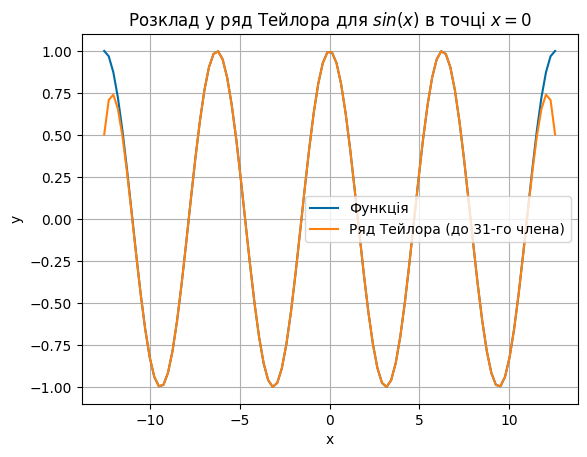

In [ ]:

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

plt.style.use('tableau-colorblind10')

plt.plot(x_vals, y_vals_func, label='Функція')
plt.plot(x_vals, y_vals_taylor, label=f'Ряд Тейлора (до {n_terms}-го члена)')
plt.title(f'Розклад у ряд Тейлора для $sin(x)$ в точці $x={x0}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

Застосування: обчислення інтегралів

In [ ]:
import sympy as sp

# Визначення символьної змінної
x = sp.symbols('x')

# Визначення функції експоненти та її розклад у ряд Тейлора
exp_func = sp.exp(-x**2)
taylor_series_exp = sp.series(exp_func, x, 0, 15).removeO()  # Ряд Тейлора до 5-го члена

# Обчислення інтеграла за допомогою ряду Тейлора
integral_taylor_exp = sp.integrate(taylor_series_exp, (x, 0, 1))

# Вивід результатів
print("Функція експоненти:", exp_func)
print("Ряд Тейлора для експоненти:", taylor_series_exp)
print("Інтеграл за допомогою ряду Тейлора:", integral_taylor_exp.evalf())


Функція експоненти: exp(-x**2)
Ряд Тейлора для експоненти: -x**14/5040 + x**12/720 - x**10/120 + x**8/24 - x**6/6 + x**4/2 - x**2 + 1
Інтеграл за допомогою ряду Тейлора: 0.746822806822807


#Ряд Фур'є з дійсними коефіцієнтами

0.9241689570029828


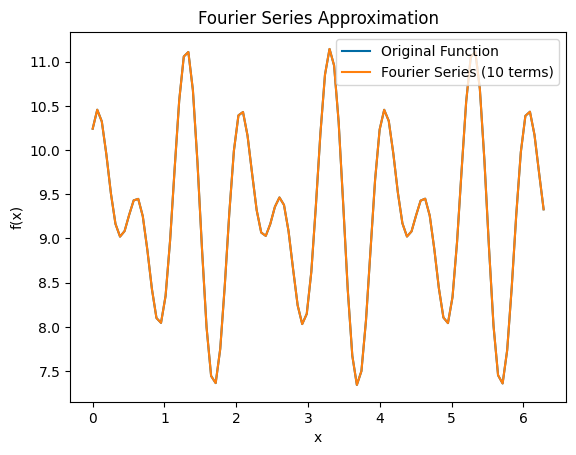

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import random

# Генеруємо випадкове дійсне число
random_number = random.random()

print(random_number)

# Задаємо символьну змінну x
x = sp.symbols('x')

# Signal parameters
amplitude = 1.0  # Amplitude of the sinusoidal signal
frequency1 = 1  # Frequency of the sinusoidal signal (in Hertz)
frequency2 = 3/2  # Frequency of the sinusoidal signal (in Hertz)
phase = 0   # Initial phase of the sinusoidal signal (in radians)
T = 2
omega = (2 * sp.pi) / T

# Задаємо функцію, яку будемо розкладати
func =  amplitude * sp.sin(2 * sp.pi * frequency1 * x + phase) + amplitude * sp.cos(2 * sp.pi * frequency2 * x + phase) + 10*random_number


# Функція для обчислення дійсних коефіцієнтів ряду Фур'є
def calculate_fourier_coefficients(func, n_terms=10):
    # a_0 = (2 / sp.pi) * sp.integrate(func, (x, 0, sp.pi))
    # a_n = [(2 / sp.pi) * sp.integrate(func * sp.cos(i * x), (x, 0, sp.pi)) for i in range(1, n_terms + 1)]
    # b_n = [(2 / sp.pi) * sp.integrate(func * sp.sin(i * x), (x, 0, sp.pi)) for i in range(1, n_terms + 1)]

    a_0 = (2 / T) * sp.integrate(func, (x, -T/2, T/2))
    a_n = [(2 / T) * sp.integrate(func * sp.cos(omega * i * x), (x, -T/2, T/2)) for i in range(1, n_terms + 1)]
    b_n = [(2 / T) * sp.integrate(func * sp.sin(omega * i * x), (x, -T/2, T/2)) for i in range(1, n_terms + 1)]

    return a_0, a_n, b_n

# Функція для обчислення суми ряду Фур'є
def fourier_series(x_val, a_0, a_n, b_n, n_terms, omega):
    series_sum = a_0 / 2
    for i in range(1, n_terms + 1):
        term = a_n[i - 1] * sp.cos(omega * i * x_val) + b_n[i - 1] * sp.sin(omega * i * x_val)
        series_sum += term
    return series_sum

n_terms = 3

# Отримуємо дійсні коефіцієнти ряду Фур'є
a_0, a_n, b_n = calculate_fourier_coefficients(func, n_terms=n_terms)

# Отримуємо значення x для побудови графіка
x_values = np.linspace(0, 2*np.pi, 100)

# Отримуємо значення функції та ряду Фур'є
f_values = [func.evalf(subs={x: val}) for val in x_values]
fourier_values = [fourier_series(x_val, a_0, a_n, b_n, n_terms, omega).evalf() for x_val in x_values]

# Побудова графіків
plt.plot(x_values, f_values, label='Original Function')
plt.plot(x_values, fourier_values, label='Fourier Series (10 terms)')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fourier Series Approximation')
plt.show()


#Комплексні числа

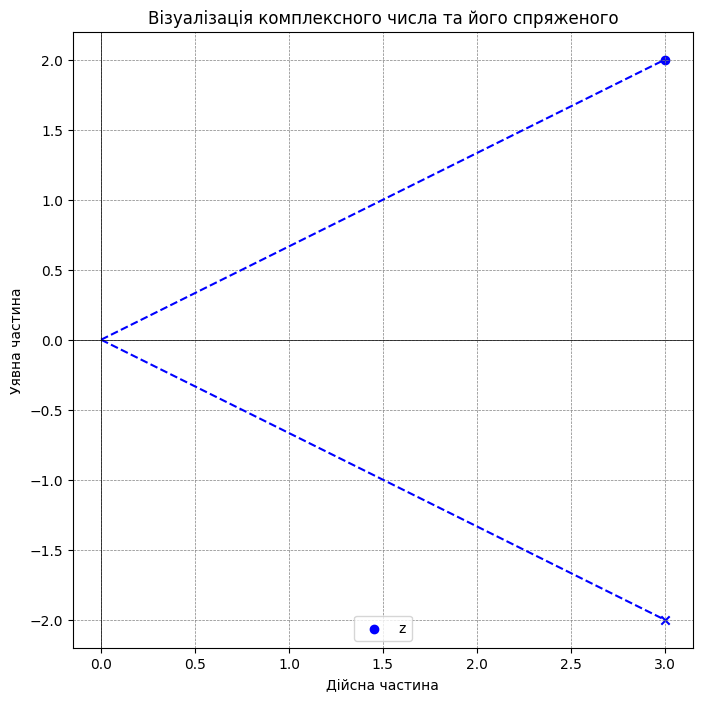

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Функція для візуалізації комплексного числа та його спряженого
def plot_complex_and_conjugate(z, color='blue', label=None):
    plt.scatter(z.real, z.imag, color=color, label=label)
    plt.plot([0, z.real], [0, z.imag], color=color, linestyle='--')
    plt.scatter(z.real, -z.imag, color=color, marker='x')  # візуалізація спряженого
    plt.plot([0, z.real], [0, -z.imag], color=color, linestyle='--')

# Задаємо комплексне число
z = 3 + 2j

# Відображаємо комплексне число та його спряжене
plt.figure(figsize=(8, 8))
plot_complex_and_conjugate(z, color='blue', label='z')

# Налаштування графіка
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Візуалізація комплексного числа та його спряженого')
plt.xlabel('Дійсна частина')
plt.ylabel('Уявна частина')
plt.legend()
plt.show()


#Комплексний ряд Фур'є

[0.5*pi*exp(-20.0*I)/(-200 + 2*pi**2) - 0.5*pi*exp(20.0*I)/(-200 + 2*pi**2), 1.0*pi*exp(-19.0*I)/(-361 + 4*pi**2) - 1.0*pi*exp(19.0*I)/(-361 + 4*pi**2), 0.5*pi*exp(-18.0*I)/(-162 + 2*pi**2) - 0.5*pi*exp(18.0*I)/(-162 + 2*pi**2), -1.0*pi*exp(17.0*I)/(-289 + 4*pi**2) + 1.0*pi*exp(-17.0*I)/(-289 + 4*pi**2), -0.5*pi*exp(16.0*I)/(-128 + 2*pi**2) + 0.5*pi*exp(-16.0*I)/(-128 + 2*pi**2), -1.0*pi*exp(15.0*I)/(-225 + 4*pi**2) + 1.0*pi*exp(-15.0*I)/(-225 + 4*pi**2), 0.5*pi*exp(-14.0*I)/(-98 + 2*pi**2) - 0.5*pi*exp(14.0*I)/(-98 + 2*pi**2), 1.0*pi*exp(-13.0*I)/(-169 + 4*pi**2) - 1.0*pi*exp(13.0*I)/(-169 + 4*pi**2), 0.5*pi*exp(-12.0*I)/(-72 + 2*pi**2) - 0.5*pi*exp(12.0*I)/(-72 + 2*pi**2), 1.0*pi*exp(-11.0*I)/(-121 + 4*pi**2) - 1.0*pi*exp(11.0*I)/(-121 + 4*pi**2), -0.5*pi*exp(10.0*I)/(-50 + 2*pi**2) + 0.5*pi*exp(-10.0*I)/(-50 + 2*pi**2), -1.0*pi*exp(9.0*I)/(-81 + 4*pi**2) + 1.0*pi*exp(-9.0*I)/(-81 + 4*pi**2), -0.5*pi*exp(8.0*I)/(-32 + 2*pi**2) + 0.5*pi*exp(-8.0*I)/(-32 + 2*pi**2), 1.0*pi*exp(-7.0*I)/

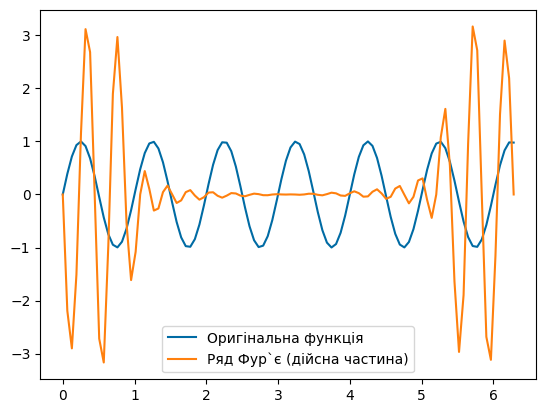

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


import sympy as sp
import matplotlib.pyplot as plt

# Задаємо символьну змінну x
x = sp.symbols('x')

# Signal parameters
amplitude = 1.0  # Amplitude of the sinusoidal signal
frequency1 = 1  # Frequency of the sinusoidal signal (in Hertz)
# frequency2 = 3/2  # Frequency of the sinusoidal signal (in Hertz)
frequency2 = 1
phase = 0   # Initial phase of the sinusoidal signal (in radians)
T = 2
# omega = (2 * sp.pi) / T
omega = 1

# Задаємо функцію, яку будемо розкладати
# func = amplitude * sp.sin(2 * sp.pi * frequency1 * x + phase) + amplitude * sp.cos(2 * sp.pi * frequency2 * x + phase)
#func = sp.sin(x)

func = amplitude * sp.sin(2 * sp.pi * frequency1 * x + phase)
# Функція для обчислення дійсних коефіцієнтів ряду Фур'є
def calculate_fourier_coefficients(func, n_terms=100):

    c_n = [(1 / T) * sp.integrate(func * sp.exp(- sp.I * omega * i * x), (x, -T/2, T/2)) for i in range(-n_terms, n_terms+1)]

    return c_n

# Функція для обчислення суми ряду Фур'є
def fourier_series(x_val, c_n, n_terms, omega):
    series_sum = 0
    for i in range(-n_terms, n_terms + 1):
        term = c_n[i] * sp.exp(sp.I * omega * i * x_val)
        series_sum += term

    return series_sum

n_terms = 20

# Отримуємо дійсні коефіцієнти ряду Фур'є
c_n = calculate_fourier_coefficients(func, n_terms=n_terms)
print(c_n)
# Отримуємо значення x для побудови графіка

x_values = np.linspace(0, 2*np.pi, 100)
# Отримуємо значення функції та ряду Фур'є
f_values = [func.evalf(subs={x: val}) for val in x_values]

fourier_values = [fourier_series(x_val, c_n, n_terms, omega).evalf() for x_val in x_values]

real_fourier_values = [sp.re(fourier_val).evalf() for fourier_val in fourier_values]
im_fourier_values = [sp.im(fourier_val).evalf() for fourier_val in fourier_values]



# Візуалізація результату
plt.plot(x_values, np.real(f_values), label='Оригінальна функція')
# plt.plot(x_values, np.imag(f_values), label='Оригінальна функція (уявна частина)')
plt.plot(x_values, real_fourier_values, label='Ряд Фур`є (дійсна частина)')
# plt.plot(x_values, im_fourier_values, label='Ряд Фур`є (уявна частина)')
plt.legend()
plt.show()


#Дискретне перетворення Фур'є

Генерація сигналу для експерименту

In [ ]:
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# https://gist.github.com/OmarAlkousa/4bd0bacb0ff976be4105777965854e06
# Import the required package
import numpy as np

# Building a class Signal for better use.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.

  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.

    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians

    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)

  # Generate sine wave
  def sine(self):
    """
    Method of Signal

    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)

  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal

    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

Сигнал, який ми будемо генерувати за допомогою попереднього класу, містить три синусоїди (1, 10, 20) Гц з амплітудами (3, 1, 0,5) відповідно. Частота дискретизації становитиме 200, а тривалість сигналу – 2 секунди.

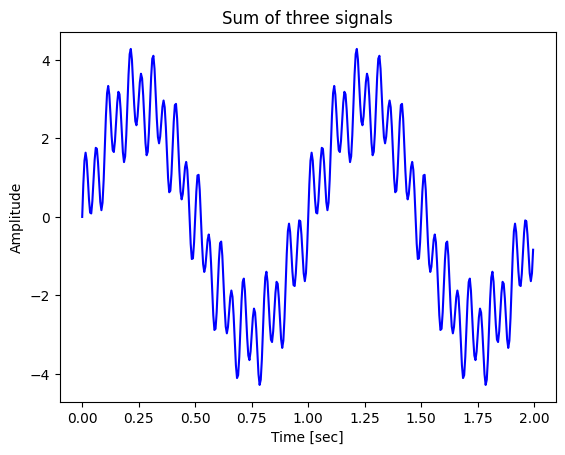

In [ ]:
# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

#Швидке перетворення Фур'є

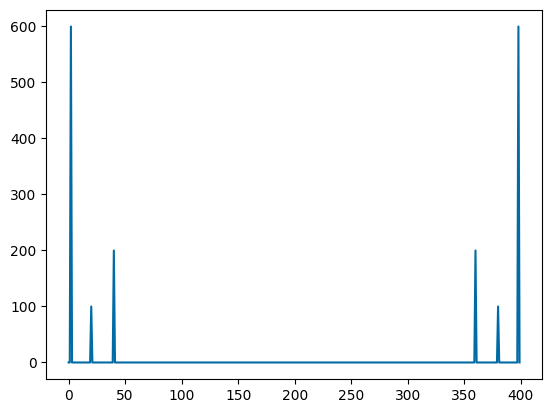

In [ ]:
# Apply the FFT on the signal
fourier = fft(signal)

# Plot the result (the spectrum |Xk|)
plt.plot(np.abs(fourier))
plt.show()

Щоб отримати фактичні амплітуди спектра, ми повинні нормалізувати вихід (fft) на N/2 кількості вибірок.

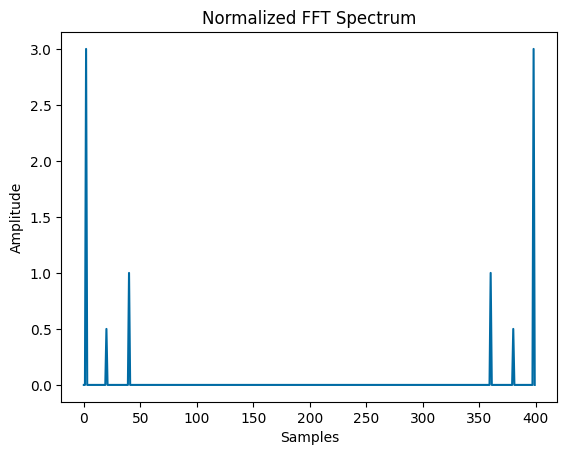

In [ ]:
# Calculate N/2 to normalize the FFT output
N = len(signal)
normalize = N/2

# Plot the normalized FFT (|Xk|)/(N/2)
plt.plot(np.abs(fourier)/normalize)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')
plt.show()

Рисунок вище зображує частотний спектр сигналу. На осі  x  відкладено кількість вибірок (замість компонентів частоти), а на осі  y  — амплітуди синусоїд.

Щоб отримати компоненти частоти (вісь x), ви можете використовувати (fftfreq) із пакета scipy. Цей метод потребує кількості вибірок (N) і частоти дискретизації як вхідних аргументів. І повертає вісь частот із N частотними компонентами.

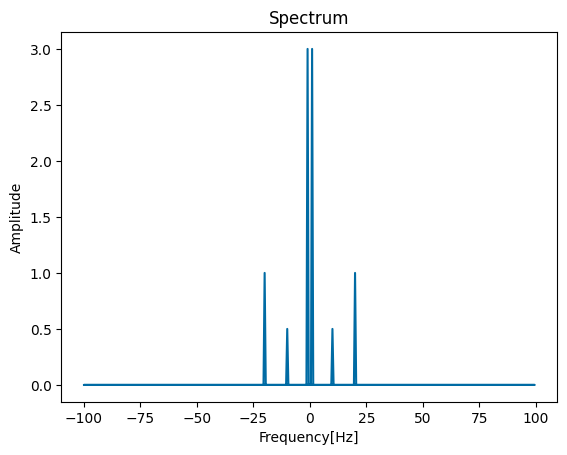

In [ ]:
# Get the frequency components of the spectrum
sampling_rate = 200.0 # It's used as a sample spacing
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(fourier)/normalize
# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

#Використання в задачах обробки звуку

Перетворення Фур'є використовується для аналізу частотного складу сигналів у часовій області. У контексті аудіосигналів та часових рядів це може бути важливим інструментом для вилучення ознак та отримання інформації про частотний спектр сигналів. Далі вилучені ознаки можуть бути застосовані в системі розпізнавання звуків.





In [ ]:
import os
import librosa
import zipfile
from urllib.request import urlretrieve
from IPython.display import Audio

# Завантаження та розархівування датасету
url = "https://github.com/karoldvl/ESC-50/archive/master.zip"
zip_file_path = "ESC-50-master.zip"
download_path = "./ESC-50-master/"
if not os.path.exists(download_path):
    urlretrieve(url, zip_file_path)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    os.remove(zip_file_path)



In [ ]:
import pandas as pd
# Read CSV file ... meta/esc50.csv
df_file_path = os.path.join(download_path, "ESC-50-master/meta", "esc50.csv")
df = pd.read_csv(df_file_path)
df.head(5)
# print(df.shape)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [ ]:
# Завантаження аудіофайлу за допомогою librosa
audio_file_path = os.path.join(download_path, "ESC-50-master/audio", "1-59513-A-0.wav")
y, sr = librosa.load(audio_file_path, sr=None)

# Виведення інформації про аудіо
print(f"Завантажено аудіо файл: {audio_file_path}")
print(f"Довжина аудіо: {len(y)} зразків")
print(f"Частота дискретизації: {sr} Гц")

Audio(audio_file_path)

Завантажено аудіо файл: ./ESC-50-master/ESC-50-master/audio/1-59513-A-0.wav
Довжина аудіо: 220500 зразків
Частота дискретизації: 44100 Гц


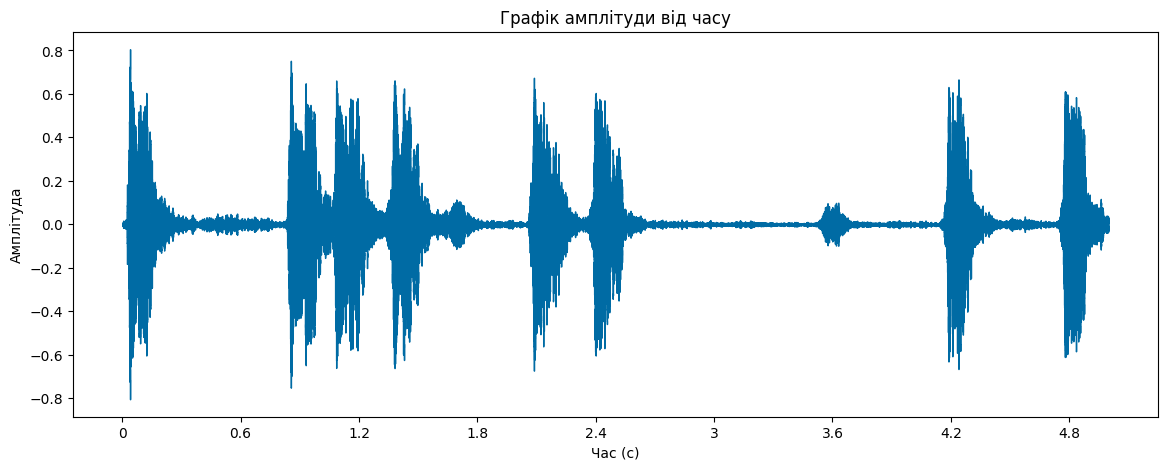

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Зображення графіка амплітуди від часу
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Графік амплітуди від часу')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.show()


Ця візуалізація називається представленням даного сигналу в часовій області. Це показує нам гучність (амплітуду) звукової хвилі, яка змінюється з часом. Тут амплітуда = 0 означає тишу. (З визначення звукових хвиль — ця амплітуда насправді є амплітудою частинок повітря, які коливаються через зміну тиску в атмосфері через звук).

Ці амплітуди малоінформативні, оскільки говорять лише про гучність аудіозапису. Щоб краще зрозуміти звуковий сигнал, необхідно перетворити його в частотну область. Представлення сигналу в частотній області повідомляє нам, які різні частоти присутні в сигналі.

Як ми вже знаємо, перетворення Фур’є дає нам змогу змінити перспективу з часової області, де ми бачимо, як сигнал змінюється з часом, на частотну область, де ми можемо бачити різні частоти, що складають сигнал. Також згадаємо, що для дискретних сигналів, таких як цифрові аудіодані, ми використовуємо дискретне перетворення Фур’є (ДПФ).







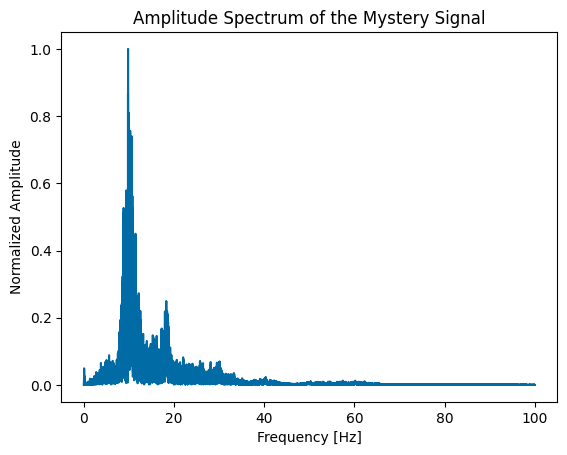

Dominant Frequencies:  [ 9.79591837  9.80952381  9.81405896  9.89569161  9.98639456 10.00907029
 10.07709751 10.09070295 10.14058957 10.28117914 10.28571429 10.29024943
 10.30385488 10.40816327 10.430839   10.48526077 10.57142857 10.64399093]


In [ ]:
import numpy as np
from scipy.fft import fft

mystery_signal = y
num_samples = sr


# Perform the Fourier Transform on the mystery signal
mystery_signal_fft = fft(mystery_signal)

# Compute the amplitude spectrum
amplitude_spectrum = np.abs(mystery_signal_fft)

# Normalize the amplitude spectrum
amplitude_spectrum = amplitude_spectrum / np.max(amplitude_spectrum)

# Compute the frequency array
freqs = np.fft.fftfreq(num_samples, 1 / sampling_rate)

# Plot the amplitude spectrum in the frequency domain
plt.plot(freqs[:num_samples // 2], amplitude_spectrum[:num_samples // 2])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Normalized Amplitude")
plt.title("Amplitude Spectrum of the Mystery Signal")
plt.show()

# Find the dominant frequencies
threshold = 0.6
dominant_freq_indices = np.where(amplitude_spectrum[:num_samples // 2] >= threshold)[0]
dominant_freqs = freqs[dominant_freq_indices]

print("Dominant Frequencies: ", dominant_freqs)

## Спектрограма звукового сигналу

**Спектрограма** — це графічне представлення часово-частотного аналізу сигналу, яке використовується для візуалізації та аналізу частотного складу звукового сигналу в залежності від часу. Зазвичай спектрограма має дві осі: горизонтальну (вісь часу) та вертикальну (вісь частоти), де кожен піксель або квадрат відповідає інтенсивності або енергії певного частотного компонента в конкретний момент часу.

Процес створення спектрограми включає такі етапи:

1. **Ділення сигналу на короткі часові вікна**
   - Звуковий сигнал розбивається на короткі часові вікна, іноді вони називаються "фреймами". Це дозволяє аналізувати частотний склад сигналу в маленьких відрізках часу.

2. **Застосування перетворення Фур'є до кожного вікна**
   - На кожному вікні застосовується перетворення Фур'є для перетворення сигналу з часової області в частотну.

3. **Вимірювання інтенсивності або енергії частот**
   - Для кожного вікна вимірюється інтенсивність або енергія частот у заданих часових та частотних діапазонах.

4. **Побудова графіка**
   - Інтенсивність частот представляється кольором або яскравістю пікселів на графіку. Чим яскравіший колір або вища яскравість, тим більше енергії відповідає цій частоті в конкретний момент часу.

Спектрограми широко використовуються у звуковому аналізі та обробці, в музичній індустрії, обробці мови, медицині та інших сферах. Вони дозволяють аналізувати частотний склад сигналу в залежності від часу та виявляти важливі особливості, такі як ритмічні структури, частоти основних компонентів та інші акустичні характеристики.

Отже, ідея полягає в тому, щоб розбити аудіосигнал на менші кадри (вікна) й обчислити DFT (або FFT) для кожного вікна. Таким чином ми отримаємо частоти для кожного вікна, а номер вікна представлятиме час. Першим є вікно 1, потім вікно 2… і так далі. Хороша практика, щоб ці вікна накладалися, інакше ми можемо втратити кілька частот. Розмір вікна залежить від походження звуку, який аналізується.

Наприклад, для типового завдання розпізнавання мовлення рекомендовано вікно від 20 до 30 мс. Людина не може вимовити більше однієї фонеми в цьому часовому вікні. Отже, зберігаючи вікно набагато меншим, ми не втратимо жодної фонеми під час класифікації. Перекриття кадру (вікна) може варіюватися від 25% до 75% відповідно до ваших потреб, як правило, для розпізнавання мовлення зберігається 50%.

У нашому розрахунку спектрограми ми збережемо тривалість вікна 20 мс і перекриття вікон 50%. Оскільки наш сигнал дискретизується на частоті 16k, кожне вікно матиме (16000 * 20 * 0,001) = 320 амплітуд. Для перекриття 50% нам потрібно просунутися вперед на (320/2) = 160 значень амплітуди, щоб перейти до наступного вікна. Отже, наше значення кроку дорівнює 160.

Розглянемо далі функцію спектрограми. Тут використовується вікно зважування (Hanning, функція np.hanning), і ми множимо його на амплітуди перед тим, як передати його функції ШПФ (np.fft). Вікно зважування використовується тут для обробки розривів цього малого сигналу (малого сигналу з одного кадру) перед передачею його в алгоритм ШПФ.





In [ ]:
def spectrogram(samples, sample_rate, stride_ms = 10.0,
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples,
                                          shape = nshape, strides = nstrides)

    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]

    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2

    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale

    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])

    # Compute spectrogram feature
    # ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:, :] + eps)
    return specgram

In [ ]:
spect_matrix_db = spectrogram(y, sr)

In [ ]:
def spect_show(spect_matrix):

    plt.imshow(spect_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Візуалізація спектральної матриці')
    plt.xlabel('Номер фрейму')
    plt.ylabel('Частота')
    plt.show()


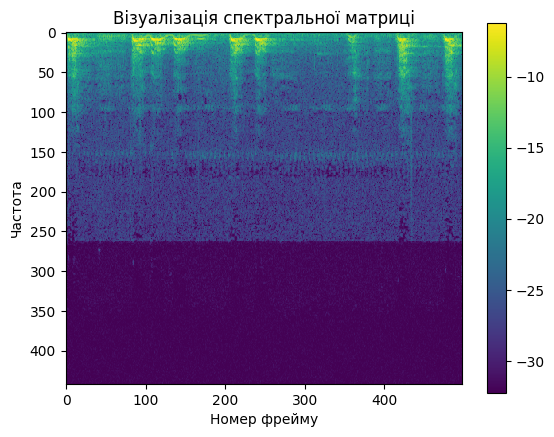

In [ ]:
spect_show(spect_matrix_db)

Отже, на спектрограмі осі мають такі значення:

1. **Вісь X (горизонтальна вісь): Час**. Величина по осі X вказує момент часу, на який відноситься кожен стовпчик у спектрограмі. Величина визначається відліками часу або кількістю вікон, які використовуються для обчислення спектра.

2. **Вісь Y (вертикальна вісь): Частота**. Величина по осі Y вказує частоту або частотний діапазон. Зазвичай це лінійна шкала, яка визначає частоти в герцах.

3. **Колір або яскравість.** Величина, яка визначає інтенсивність звуку або енергії для кожної комбінації часу та частоти. Кольори або яскравість показують, як змінюється амплітуда або енергія в різних часових та частотних діапазонах.

Отже, спектрограма надає візуальне представлення зміни інтенсивності звуку відносно часу та частоти.

Для практичного використання спектрограм у класифікаторі чи в будь-якому іншому алгоритмі можна розробити функцію пулінгу (pooling), яка буде узагальнювати спектрограму та зменшувати її розмірність.

In [ ]:
def pooling_audio(mat,ksize,method='max',pad=False):
    '''Non-overlapping pooling on 2D or 3D data.

    <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx).
    <method>: str, 'max for max-pooling,
                   'mean' for mean-pooling.
    <pad>: bool, pad <mat> or not. If no pad, output has size
           n//f, n being <mat> size, f being kernel size.
           if pad, output has size ceil(n/f).

    Return <result>: pooled matrix.
    '''

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(np.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(ny*ky, nx*kx)+mat.shape[2:]
        mat_pad=np.full(size,np.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    if method=='max':
        result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=np.nanmean(mat_pad.reshape(new_shape),axis=(1,3))

    return result


In [ ]:
# Приклад використання
from scipy.ndimage import convolve


matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [1, 0, 5, 7]])




result = pooling_audio(matrix, (2,2))
print(result)

window_size = (20, 20)

result = pooling_audio(spect_matrix_db, window_size)

print("Початкова матриця:")
print(np.shape(spect_matrix_db))

print("\nРезультат згортки:")
print(np.shape(result))



[[ 6  8]
 [10 12]]
Початкова матриця:
(442, 499)

Результат згортки:
(22, 24)


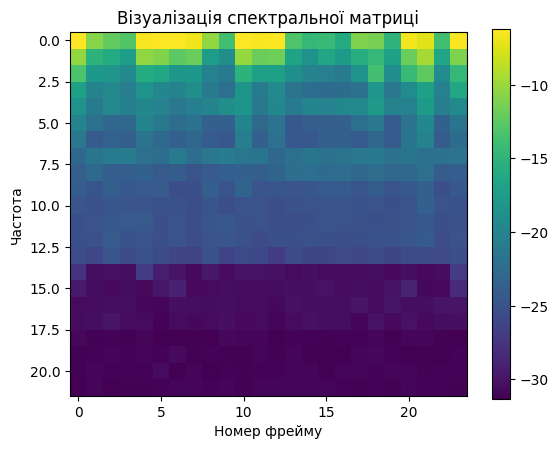

In [ ]:
spect_show(result)

# Додаткові матеріали

1. Ряд Тейлора: https://youtu.be/9YAaCEA08yM?si=nMcWXAmHjg75tSiv
3. По Фур'є: https://youtube.com/playlist?list=PLHXZ9OQGMqxdhXcPyNciLdpvfmAjS82hR&si=5YnZTYtB1pLYDV8q
4. https://www.kdnuggets.com/2020/02/fourier-transformation-data-scientist.html
5. https://realpython.com/python-scipy-fft/
6. https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/
7. https://medium.com/@ongzhixuan/frequency-analysis-of-audio-signals-with-fourier-transform-f89ac113a2b4
8. https://www.geeksforgeeks.org/audio-classification-using-spectrograms/
9. Перетворення сигналів: https://dropsofai.com/understanding-audio-data-fourier-transform-fft-and-spectrogram-features-for-a-speech-recognition-system/
10. https://medium.com/sho-jp/fourier-transform-101-part-1-b69ea3cb4837
11. https://medium.com/sho-jp/fourier-transform-101-part-2-complex-fourier-series-934a885b3921
12. https://www.techtarget.com/whatis/definition/phase (Фаза сигналу)
13. https://www.analyticsvidhya.com/blog/2021/12/a-comprehensive-guide-on-fourier-analysis/
14. Taylor Series - https://drive.google.com/file/d/1qcfbWj2lX23AqwM1M9dq88T7Qb5_B1rd/view?usp=sharing